In [1]:
pwd

'/Users/xhoxhinafacja/Desktop/python final project'

In [2]:
import pandas as pd
import sys
import os
import nltk
import pandas as pd
from os import path
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wordcloud
!pip install vaderSentiment


In [3]:
os.chdir('/Users/xhoxhinafacja/Desktop/python final project/Input')

In [4]:
pwd

'/Users/xhoxhinafacja/Desktop/python final project/input'

In [5]:
import pandas as pd

# Read csv dataset using pandas
def ingest_train():
    data = pd.read_csv('../input/billboard_lyrics_1964-2015.csv', encoding='latin-1')
    return data

In [6]:
data = ingest_train()

In [7]:
data.describe()

,Rank,Year,Source
count,5100.0000,5100.000000,4913.000000
mean,50.5000,1990.000000,1.400977
std,28.8689,14.721045,0.890375
min,1.0000,1965.000000,1.000000
25%,25.7500,1977.000000,1.000000
50%,50.5000,1990.000000,1.000000
75%,75.2500,2003.000000,1.000000
max,100.0000,2015.000000,5.000000


In [8]:
data.groupby('Year').size().describe()
# to see data description about data grouped by years in common: We have 51 different years

count     51.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
dtype: float64

In [9]:
data.head()
# to see the columns in our data along with some data

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [10]:
data.columns

Index(['Rank', 'Song', 'Artist', 'Year', 'Lyrics', 'Source'], dtype='object')

In [11]:
#contains a certain name/ to find duels
data[data['Artist'].str.contains(r'featuring')]

,Rank,Song,Artist,Year,Lyrics,Source
983,84,clap for the wolfman,the guess who featuring wolfman jack,1974,clap for the wolfman he gon rate your record h...,3.0
1760,61,one hundred ways,quincy jones featuring james ingram,1982,compliment what she does send her roses just ...,1.0
2000,1,careless whisper,wham featuring george michael,1985,time can never mend the careless whisper of a...,1.0
2262,63,cant we try,dan hill featuring vonda shepard,1987,i see your face cloud over like a little girl...,1.0
2339,40,shes like the wind,patrick swayze featuring wendy fraser,1988,shes like the wind through my dreams she ride...,1.0
2380,81,piano in the dark,brenda russell featuring joe esposito,1988,when i find myself watching the time i never ...,1.0
2512,13,pump up the jam,technotronic featuring felly,1990,pump up the jam pump it up while you feet are...,1.0
2541,42,back to life however do you want me,soul ii soul featuring caron wheeler,1990,back to life back to reality back to life bac...,1.0
2572,73,get up before the night is over,technotronic featuring ya kid k,1990,get up on your feet before the night is throu...,1.0
2584,85,cmon and get my love,d mob featuring cathy dennis,1990,NaN,NaN


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
data['Wordcount'] = data['Lyrics'].str.split().str.len()

In [14]:
subs_s = 'weed|heroine|cocaine|drugs|marihuana|smack'
alco_s = 'beer|wine|whiskey|alcohol|wodka|moonshine'
politics_s = 'democracy|reform|presidential|government|wing|affairs|authority|constitution|corruption'
love_s = 'affection|emotion|lust|passion|amour|attachment|crush'

In [15]:
#to see Wordcount of various topics in difference sets throughout the years for Lyrics

subs = data.groupby('Year').apply(lambda x: x['Lyrics'].str.count(subs_s).sum() / x['Wordcount'].sum())
alco = data.groupby('Year').apply(lambda x: x['Lyrics'].str.count(alco_s).sum() / x['Wordcount'].sum())
politics = data.groupby('Year').apply(lambda x: x['Lyrics'].str.count(politics_s).sum() / x['Wordcount'].sum())
love = data.groupby('Year').apply(lambda x: x['Lyrics'].str.count(love_s).sum() / x['Wordcount'].sum())

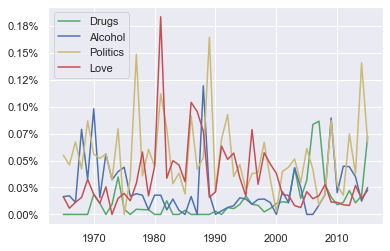

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(subs, 'g', label='Drugs')
ax.plot(alco, 'b', label='Alcohol')
ax.plot(politics, 'y', label='Politics')
ax.plot(love, 'r', label='Love')

ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
legend = ax.legend()

# the words about Love have the maximum usage in 1980 years while words about politics are more in number in the last
#years of the dataset which is 2010 till 2015. Words about love in billboard songs have decreased in last decade with words about
#politics and drugs occuring the most


In [17]:
# for creating decades from the years
data['DECADE'] = 'decade'
for x in range(0,len(data)):
    if(data["Year"][x] >= int(1950) and data["Year"][x]  < int(1960)):
        data['DECADE'][x]= 1950
    if(data["Year"][x] >= int(1960) and data["Year"][x]  < int(1970)):
         data['DECADE'][x]= 1960
    if(data["Year"][x]  >= int(1970) and data["Year"][x]  < int(1980)):
        data['DECADE'][x]= 1970
    if(data["Year"][x]  >= int(1980) and data["Year"][x]  < int(1990)):
        data['DECADE'][x]= 1980
    if(data["Year"][x]  >= int(1990) and data["Year"][x]  < int(2000)):
        data['DECADE'][x]= 1990
    if(data["Year"][x] >= int(2000) and data["Year"][x]  < int(2010)):
        data['DECADE'][x]= 2000
    if(data["Year"][x] >= int(2010) and data["Year"][x]  < int(2020)):
        data['DECADE'][x]= 2010    
  

/Users/xhoxhinafacja/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/xhoxhinafacja/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xhoxhinafacja/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/User

In [18]:
data[["Artist","Song","DECADE"]]

,Artist,Song,DECADE
0,sam the sham and the pharaohs,wooly bully,1960
1,four tops,i cant help myself sugar pie honey bunch,1960
2,the rolling stones,i cant get no satisfaction,1960
3,we five,you were on my mind,1960
4,the righteous brothers,youve lost that lovin feelin,1960
5,petula clark,downtown,1960
6,the beatles,help,1960
7,hermans hermits,cant you hear my heart beat,1960
8,elvis presley,crying in the chapel,1960
9,the temptations,my girl,1960


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24f404a8>,
      dtype=object)

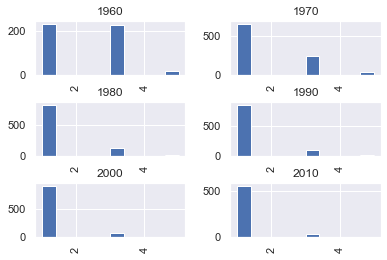

In [19]:
data.hist(column='Source', by='DECADE')
# to see how sources type of infomation differ from each decade
# sources indicate different websites the data has been derived from


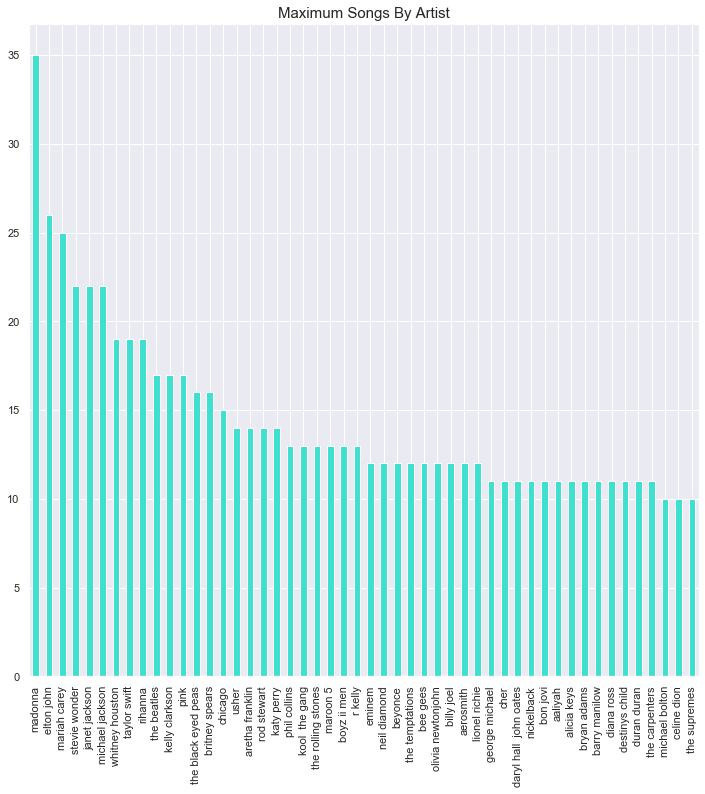

In [20]:
#to see which artist has the maximum songs in billboard throughout the years
# only top 50 artists have been considered for graph purposes
plt.figure(figsize=(12,12))
plt.title("Maximum Songs By Artist",fontsize=15)
data['Artist'].value_counts()[0:50].plot('bar',color='turquoise')

#Madonna's songs have appeared the most in Billboard


In [21]:
# to find the length of each lyrics

data['ly_count'] = data['Lyrics'].str.len()
data.head()



,Rank,Song,Artist,Year,Lyrics,Source,Wordcount,DECADE,ly_count
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,1960,662.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,1960,995.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,1960,2.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,1960,692.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,1960,1173.0


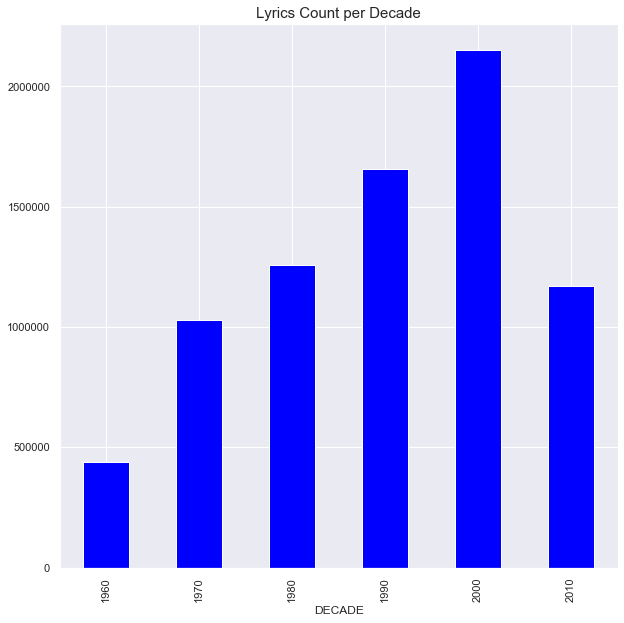

In [22]:
# to find the lyrics count for each decade 
Total_year_count = data.groupby(['DECADE'])['ly_count'].sum()
plt.figure(figsize=(10,10))
plt.title("Lyrics Count per Decade",fontsize=15)
Total_year_count.plot(kind='BAR',color="BLUE")

#in 2000 decade the maximum lyrics count were used 

In [23]:
lyrics=data['Song']

In [24]:
tokenized=[]
for element in lyrics:
    tokenized.extend(element.split())

In [25]:
tokenized

['wooly',
 'bully',
 'i',
 'cant',
 'help',
 'myself',
 'sugar',
 'pie',
 'honey',
 'bunch',
 'i',
 'cant',
 'get',
 'no',
 'satisfaction',
 'you',
 'were',
 'on',
 'my',
 'mind',
 'youve',
 'lost',
 'that',
 'lovin',
 'feelin',
 'downtown',
 'help',
 'cant',
 'you',
 'hear',
 'my',
 'heart',
 'beat',
 'crying',
 'in',
 'the',
 'chapel',
 'my',
 'girl',
 'help',
 'me',
 'rhonda',
 'king',
 'of',
 'the',
 'road',
 'the',
 'birds',
 'and',
 'the',
 'bees',
 'hold',
 'me',
 'thrill',
 'me',
 'kiss',
 'me',
 'shotgun',
 'i',
 'got',
 'you',
 'babe',
 'this',
 'diamond',
 'ring',
 'the',
 'in',
 'crowd',
 'mrs',
 'brown',
 'youve',
 'got',
 'a',
 'lovely',
 'daughter',
 'stop',
 'in',
 'the',
 'name',
 'of',
 'love',
 'unchained',
 'melody',
 'silhouettes',
 'ill',
 'never',
 'find',
 'another',
 'you',
 'cara',
 'mia',
 'mr',
 'tambourine',
 'man',
 'cast',
 'your',
 'fate',
 'to',
 'the',
 'wind',
 'yes',
 'im',
 'ready',
 'whats',
 'new',
 'pussycat',
 'eve',
 'of',
 'destruction',
 'han

In [26]:
from collections import Counter

dict_counts=Counter(tokenized)
dict_counts

Counter({'wooly': 1,
         'bully': 1,
         'i': 395,
         'cant': 61,
         'help': 11,
         'myself': 7,
         'sugar': 13,
         'pie': 3,
         'honey': 7,
         'bunch': 1,
         'get': 89,
         'no': 59,
         'satisfaction': 1,
         'you': 579,
         'were': 22,
         'on': 183,
         'my': 246,
         'mind': 21,
         'youve': 8,
         'lost': 7,
         'that': 64,
         'lovin': 15,
         'feelin': 4,
         'downtown': 4,
         'hear': 5,
         'heart': 70,
         'beat': 10,
         'crying': 4,
         'in': 224,
         'the': 627,
         'chapel': 1,
         'girl': 70,
         'me': 375,
         'rhonda': 1,
         'king': 4,
         'of': 224,
         'road': 9,
         'birds': 1,
         'and': 113,
         'bees': 1,
         'hold': 28,
         'thrill': 3,
         'kiss': 24,
         'shotgun': 1,
         'got': 50,
         'babe': 4,
         'this': 69,
         'd

In [27]:
# Clean data in the sense that considering lower case and split the words/ 
#there is no punct in lyrics

data['Cleaned_Lyrics'] = data['Lyrics'].str.lower().str.split()

In [28]:
data['Cleaned_Lyrics']

0       [sam, the, sham, miscellaneous, wooly, bully, ...
1       [sugar, pie, honey, bunch, you, know, that, i,...
2                                                      []
3       [when, i, woke, up, this, morning, you, were, ...
4       [you, never, close, your, eyes, anymore, when,...
5       [when, youre, alone, and, life, is, making, yo...
6       [help, i, need, somebody, help, not, just, any...
7       [carterlewis, every, time, i, see, you, lookin...
8       [you, saw, me, crying, in, the, chapel, the, t...
9       [ive, got, sunshine, on, a, cloudy, day, when,...
10      [well, since, she, put, me, down, i, ve, been,...
11      [trailer, for, sale, or, rent, rooms, to, let,...
12      [let, me, tell, ya, bout, the, birds, and, the...
13      [hold, me, hold, me, never, let, me, go, until...
14      [i, said, ì¢shotgun, shoot, em, for, he, runs,...
15      [they, say, were, young, and, we, dont, know, ...
16      [who, wants, to, buy, this, diamond, ring, she...
17            

In [29]:
data.head()

,Rank,Song,Artist,Year,Lyrics,Source,Wordcount,DECADE,ly_count,Cleaned_Lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,1960,662.0,"[sam, the, sham, miscellaneous, wooly, bully, ..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,1960,995.0,"[sugar, pie, honey, bunch, you, know, that, i,..."
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,1960,2.0,[]
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,1960,692.0,"[when, i, woke, up, this, morning, you, were, ..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,1960,1173.0,"[you, never, close, your, eyes, anymore, when,..."


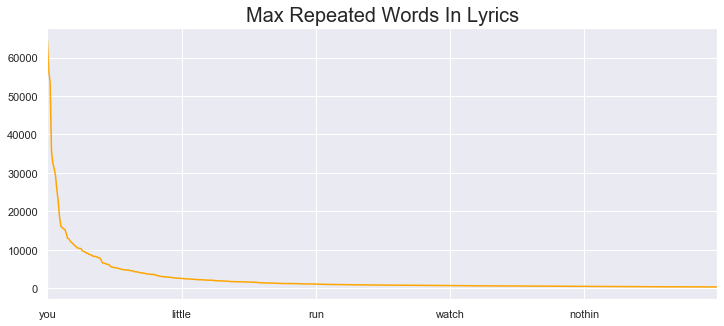

In [30]:
plt.figure(figsize=(12,5))
plt.title("Max Repeated Words In Lyrics",fontsize=20)
words = pd.Series(' '.join(data['Lyrics'].astype(str)).lower().split(" ")).value_counts()[0:500]
words.plot(color='orange')

In [31]:
from wordcloud import WordCloud

In [32]:
from wordcloud import WordCloud,STOPWORDS

In [33]:
stopwords= set(STOPWORDS)

In [34]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [35]:
stopwords = set(STOPWORDS)
stopwords.update(["dont", "say", "aint", "got", "will","us","im","sind","still","ant"])

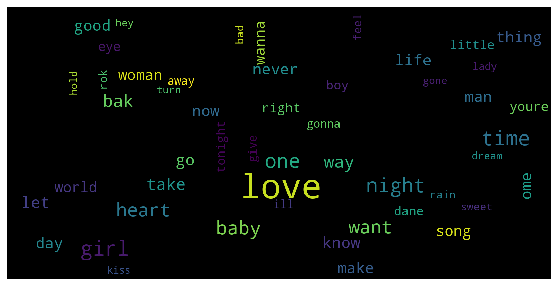

In [36]:
# wordcloud of 50 top words used in Songs 

allwords = ' '.join(data['Song']).lower().replace('c', '')
cloud = WordCloud(background_color='black',
                            max_font_size=100,
                            width=1600,
                            height=800,
                            max_words=50,
                            stopwords=stopwords,
                            relative_scaling=.5).generate(allwords)
plt.figure(figsize=(12,5))
plt.axis('off')

plt.imshow(cloud);

In [56]:
stopwords = set(STOPWORDS)
stopwords.update(["featuring"])

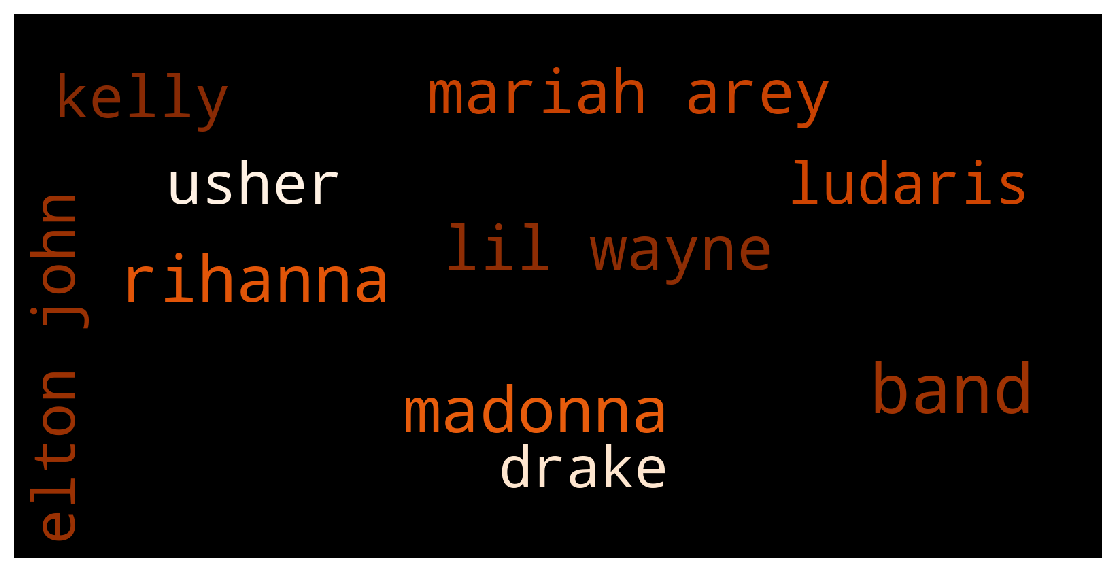

In [59]:
# top 10 most frequent Artist, deleting featuring


allwords = ' '.join(data['Artist']).lower().replace('c', '')
cloud = WordCloud(background_color='black',
                            colormap="Oranges_r",
                            max_font_size=100,
                            width=1600,
                            height=800,
                            max_words=10,
                            stopwords=stopwords,
                            relative_scaling=.5).generate(allwords)
plt.figure(figsize=(12,5))
plt.axis('off')

plt.imshow(cloud);

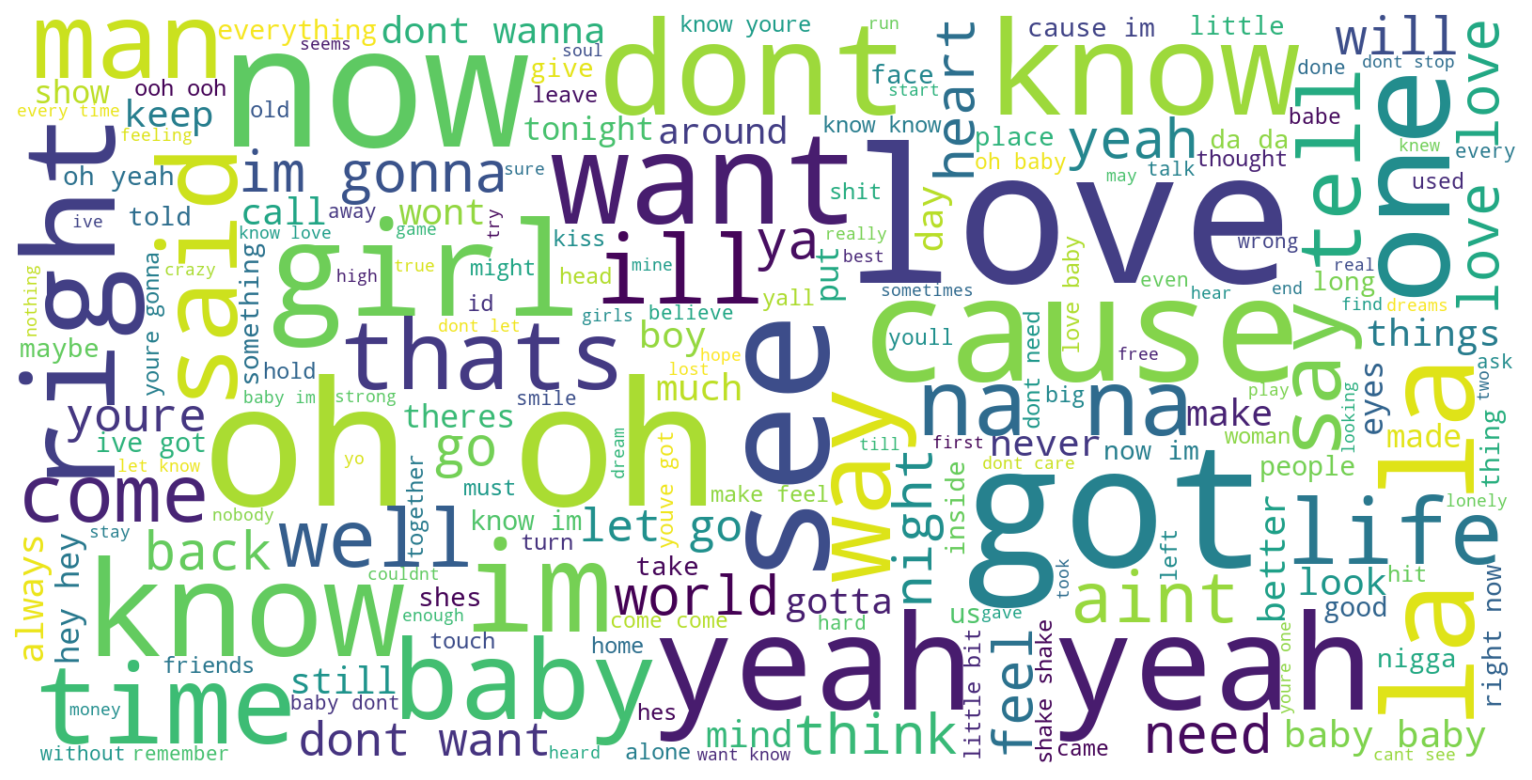

In [38]:
#Most popular words in Lyrics in the past 50 years of songs

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from wordcloud import WordCloud, STOPWORDS


popular_words = []
for t in data.Lyrics:
    popular_words.append(t)
popular_words = pd.Series(popular_words).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color='white',normalize_plurals=False).generate(popular_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/xhoxhinafacja/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
data.head()

,Rank,Song,Artist,Year,Lyrics,Source,Wordcount,DECADE,ly_count,Cleaned_Lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,1960,662.0,"[sam, the, sham, miscellaneous, wooly, bully, ..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,1960,995.0,"[sugar, pie, honey, bunch, you, know, that, i,..."
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,1960,2.0,[]
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,1960,692.0,"[when, i, woke, up, this, morning, you, were, ..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,1960,1173.0,"[you, never, close, your, eyes, anymore, when,..."


In [41]:
#sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [42]:
sentiment=SentimentIntensityAnalyzer()
#adding columns with scores to dataframe 

In [43]:
data['polarity_score']=data['Lyrics'].apply(lambda x:sentiment.polarity_scores(str(x))['compound'])

In [44]:
data['neutral']=data['Lyrics'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])

In [45]:
data['negative']=data['Lyrics'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])

In [46]:
data['positive']=data['Lyrics'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])

In [47]:
data.head(10)

,Rank,Song,Artist,Year,Lyrics,Source,Wordcount,DECADE,ly_count,Cleaned_Lyrics,polarity_score,neutral,negative,positive
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,1960,662.0,"[sam, the, sham, miscellaneous, wooly, bully, ...",-0.9946,0.628,0.352,0.020
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,1960,995.0,"[sugar, pie, honey, bunch, you, know, that, i,...",0.2624,0.704,0.159,0.137
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,1960,2.0,[],0.0000,0.000,0.000,0.000
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,1960,692.0,"[when, i, woke, up, this, morning, you, were, ...",-0.9607,0.754,0.186,0.061
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,1960,1173.0,"[you, never, close, your, eyes, anymore, when,...",0.9958,0.649,0.085,0.266
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,239.0,1960,1333.0,"[when, youre, alone, and, life, is, making, yo...",0.9249,0.702,0.133,0.165
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,228.0,1960,1089.0,"[help, i, need, somebody, help, not, just, any...",0.9937,0.669,0.072,0.260
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,215.0,1960,1052.0,"[carterlewis, every, time, i, see, you, lookin...",0.9885,0.850,0.000,0.150
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,148.0,1960,738.0,"[you, saw, me, crying, in, the, chapel, the, t...",0.9911,0.634,0.077,0.289
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,153.0,1960,680.0,"[ive, got, sunshine, on, a, cloudy, day, when,...",0.9500,0.854,0.013,0.133


In [48]:
data['sentiment']=''
data.loc[data.polarity_score>0.05,'sentiment']='Positive'
data.loc[(data.polarity_score>-0.05) & (data.polarity_score<0.05),'sentiment']='Neutral'
data.loc[data.polarity_score<-0.05,'sentiment']='Negative'

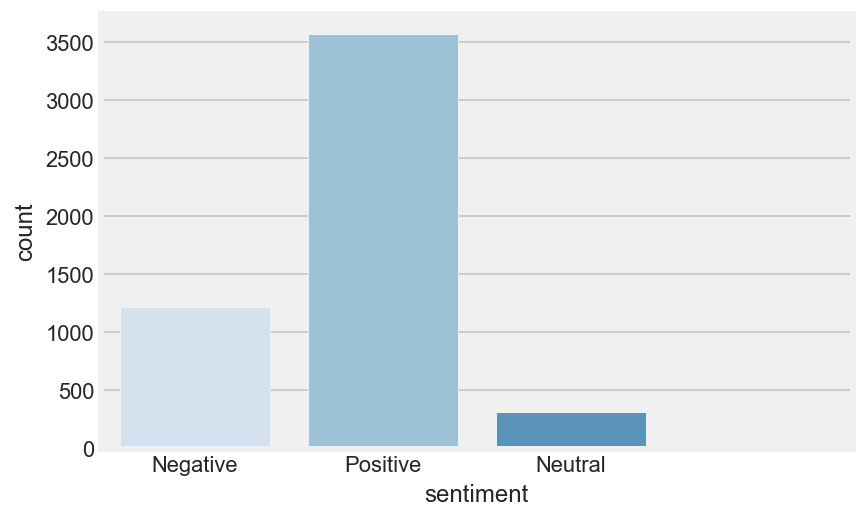

In [49]:
sns.countplot(x='sentiment', data=data, palette="Blues")

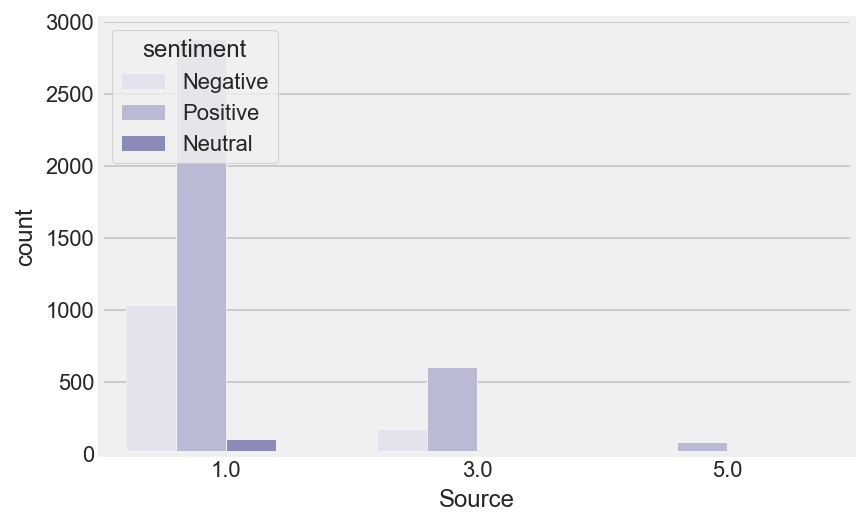

In [50]:
sns.countplot(x='Source', hue="sentiment", data=data, palette="Purples")

# to find from each source do come the most positive sentiment songs, they are coming from Source 1

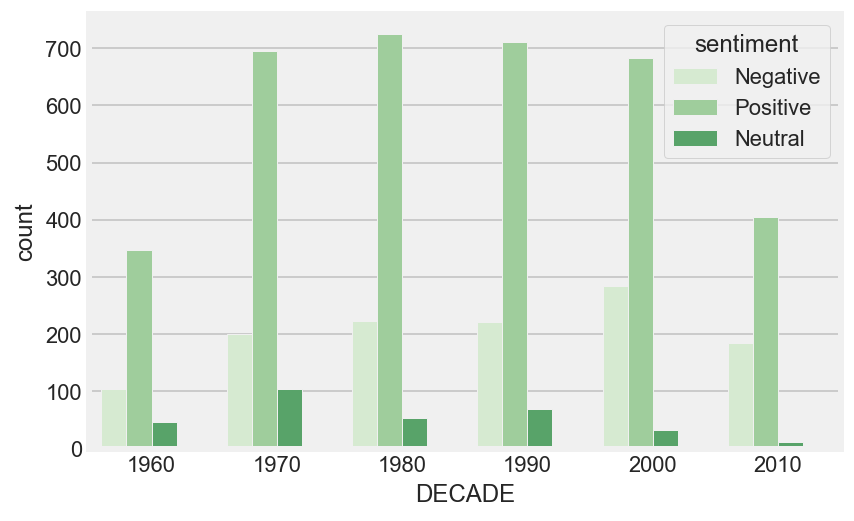

In [51]:
#how sentiment change over decades
sns.countplot(x='DECADE', hue="sentiment", data=data, palette="Greens")

# we are getting less and less positive sentiment songs with change of time

In [ ]:
#Conclusion
#Songs have changed through decades. They have become less positive, less words about love are used and words about 
#politics dominate. Overall for the whole period of the dataset they have been positive.This leads to tell that 
#billboard songs that people love are the ones who convey good sentiments.Most common words have been :girl,woman,love
#baby,song,life,world. Madonna leads the way with the most songs in the billboard. Number of lyrics in the last decade
#have been shorter than one decade before.